# Bureau of Statistics (BLS)

In [1]:
import requests
import json
import time

# import numpy as np
# from scipy.stats import linregress

import pandas as pd

import matplotlib.pyplot as plt

Currently no catalogue of IDs. Take a look at this page to get the series IDs:
https://www.bls.gov/help/hlpforma.htm

For [CUUR0000SA0L1E](https://www.bls.gov/help/hlpforma.htm#CU), see [Item](https://download.bls.gov/pub/time.series/cu/cu.item) and [Area](https://download.bls.gov/pub/time.series/cu/cu.area) codes. For more details on other attributes of data, e.g., "Seasional Adjustment", follow the links for descriptions. 

Base Year:
> Indicates the designated reference date from which price change is measured, where the "current" base year is 1982-84=100 or more recent (S) and the "alternate" base year (A) is prior to the current base year.


In [2]:
headers = {
    "Content-type": "application/json"}

series_id_dict = {
    "All":                        "CU" + "U"+ "R" + "0000" + "SA0",
    "Housing":                    "CU" + "U"+ "R" + "0000" + "SAH",
    "Shelter":                    "CU" + "U"+ "R" + "0000" + "SAH1",
    "Food":                       "CU" + "U"+ "R" + "0000" + "SAF1",
    "Health_Insurance":           "CU" + "U"+ "R" + "0000" + "SEME",
    "All_NYC-JC-NW":              "CU" + "U"+ "R" + "S12A" + "SA0",
    "Housing_NYC-JC-NW":          "CU" + "U"+ "R" + "S12A" + "SAH",
    "Shelter_NYC-JC-NW":          "CU" + "U"+ "R" + "S12A" + "SAH1",
    "Food_NYC-JC-NW":             "CU" + "U"+ "R" + "S12A" + "SAF1",
    "Health_Insurance_NYC-JC-NW": "CU" + "U"+ "R" + "S12A" + "SEME",
}

df_dict = {}
for series_name in series_id_dict.keys():
    df_dict[series_name] = pd.DataFrame(columns=["Year", "Month", "Value"])

In [3]:
end_interval_year = 2024
interval_length = 10

while end_interval_year >= 1960: 
    data = json.dumps({
        "seriesid": list(series_id_dict.values()),
        "startyear": f"{end_interval_year - interval_length}", 
        "endyear": f"{end_interval_year}"})

    p = requests.post(
        "https://api.bls.gov/publicAPI/v2/timeseries/data/", 
        data=data, 
        headers=headers)

    json_data = json.loads(p.text)
    if json_data["status"] != "REQUEST_SUCCEEDED":
        display(json_data["status"])
        display(json.dumps(json_data, indent=4))
        break

    # Append to DataFrames:
    for idx, series_name in enumerate(series_id_dict.keys()):
        for data in json_data["Results"]["series"][idx]["data"]:
            year = int(data["year"])
            month = int(data["period"][1:])
            value = float(data["value"])
            df_dict[series_name].loc[len(df_dict[series_name].index)] = [year, month, value]
        
    display(f"Decade: {end_interval_year - interval_length} - {end_interval_year}")
    display(df_dict["All"].tail(12).transpose())
    end_interval_year -= interval_length

    # time.sleep(30)

'REQUEST_NOT_PROCESSED'

'{\n    "status": "REQUEST_NOT_PROCESSED",\n    "responseTime": 0,\n    "message": [\n        "Request could not be serviced, as the daily threshold for total number of requests allocated to the user with registration key  has been reached."\n    ],\n    "Results": {}\n}'

KeyError: 'all'

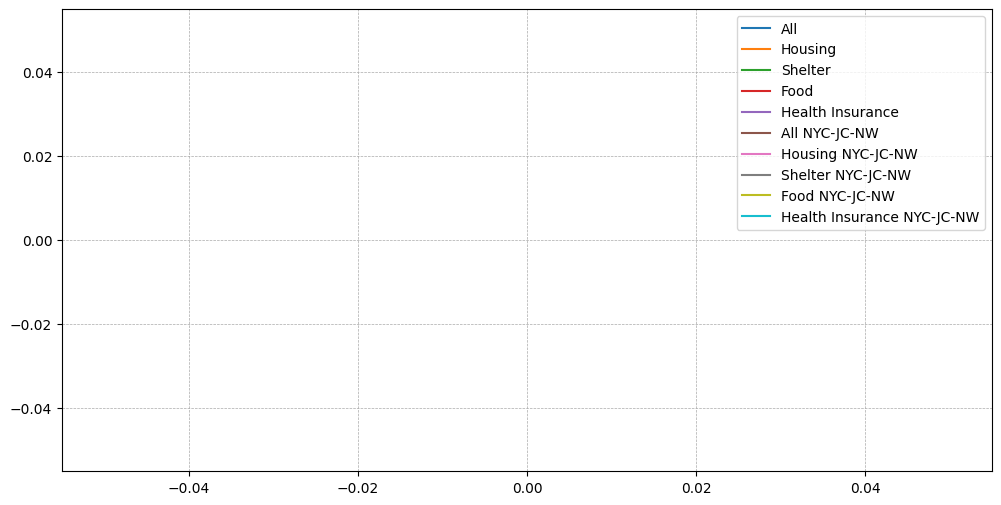

In [4]:
fig = plt.figure(figsize=(12.0, 6.0))
ax = plt.gca()

for name, df in df_dict.items():
    ax.plot(df.index, df["Value"], label=name.replace("_", " "))

ax.legend(loc="upper right")
ax.grid(lw=0.5, ls="--", color="darkgrey")
ax.set_xticks(df_dict["all"].index[::12])
ax.set_xticklabels(
    [str(int(x[0])) + "-" + str(int(x[1])) \
     for x in zip(df_dict["All"]["Year"][::12], df_dict["All"]["Month"][::12])], 
    rotation=-45, ha="left", va="top", color="darkgrey")
ax.set_axisbelow("True")

plt.show()

In [ ]:
for name, df in df_dict.items():
    df.to_csv(f"./csv_files/{name}.csv")